### Importation des librairies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import  date
import plotly.express as px #graphic library
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

In [2]:
! pip install folium

In [3]:
import folium
import folium.plugins as plugins
from folium.plugins import HeatMapWithTime
from folium.plugins import HeatMap

### Importing data

In [4]:
data_cleaned = pd.read_csv("C:/location_analytics/projet/NYPD_Complaint_Data_Historic_2019_clean.csv")

In [5]:
data_cleaned.fillna("UNKNOWN")

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM  ADDR_PCT_CD      RPT_DT  KY_CD  \
0      232973689   2019-04-23     16:18:00         44.0  04/23/2019    105   
1      398182220   2019-06-29     01:30:00        103.0  07/24/2019    341   
2      791045583   2019-01-10     18:30:00         84.0  01/10/2019    106   
3      552549706   2019-01-04     04:22:00         22.0  01/04/2019    110   
4      894206441   2019-01-03     11:09:00         40.0  01/03/2019    235   
...          ...          ...          ...          ...         ...    ...   
3990   344237194   2019-12-28     15:53:00         44.0  12/28/2019    578   
3991   807377421   2019-12-31     18:00:00          5.0  12/31/2019    344   
3992   545392320   2019-12-26     09:00:00         50.0  12/26/2019    107   
3993   346407818   2019-12-29     14:00:00        110.0  12/29/2019    105   
3994   441036813   2019-12-28     19:43:00         22.0  12/28/2019    105   

                           OFNS_DESC  PD_CD                         PD_DESC  \
0                            ROBBERY  366.0                 ROBBERY,BICYCLE   
1                      PETIT LARCENY  339.0  LARCENY,PETIT FROM OPEN AREAS,   
2                     FELONY ASSAULT  109.0        ASSAULT 2,1,UNCLASSIFIED   
3     GRAND LARCENY OF MOTOR VEHICLE  441.0           LARCENY,GRAND OF AUTO   
4                    DANGEROUS DRUGS  511.0  CONTROLLED SUBSTANCE, POSSESSI   
...                              ...    ...                             ...   
3990                   HARRASSMENT 2  637.0      HARASSMENT,SUBD 1,CIVILIAN   
3991    ASSAULT 3 & RELATED OFFENSES  101.0                       ASSAULT 3   
3992                        BURGLARY  211.0         BURGLARY,COMMERCIAL,DAY   
3993                         ROBBERY  397.0  ROBBERY,OPEN AREA UNCLASSIFIED   
3994                         ROBBERY  397.0  ROBBERY,OPEN AREA UNCLASSIFIED   

     CRM_ATPT_CPTD_CD   LAW_CAT_CD    BORO_NM LOC_OF_OCCUR_DESC  \
0           COMPLETED       FELONY      BRONX           UNKNOWN   
1           COMPLETED  MISDEMEANOR     QUEENS           UNKNOWN   
2           COMPLETED       FELONY   BROOKLYN           UNKNOWN   
3           COMPLETED       FELONY  MANHATTAN           UNKNOWN   
4           COMPLETED  MISDEMEANOR      BRONX           UNKNOWN   
...               ...          ...        ...               ...   
3990        COMPLETED    VIOLATION      BRONX           UNKNOWN   
3991        COMPLETED  MISDEMEANOR  MANHATTAN           UNKNOWN   
3992        ATTEMPTED       FELONY      BRONX            INSIDE   
3993        COMPLETED       FELONY     QUEENS           UNKNOWN   
3994        COMPLETED       FELONY  MANHATTAN            INSIDE   

            PREM_TYP_DESC        JURIS_DESC                      PARKS_NM  \
0         PARK/PLAYGROUND  N.Y. POLICE DEPT                CLAREMONT PARK   
1         PARK/PLAYGROUND  N.Y. POLICE DEPT                  MARCONI PARK   
2         PARK/PLAYGROUND  N.Y. POLICE DEPT                  TRINITY PARK   
3         PARK/PLAYGROUND  N.Y. POLICE DEPT                  CENTRAL PARK   
4         PARK/PLAYGROUND  N.Y. POLICE DEPT         ST. MARY'S PARK BRONX   
...                   ...               ...                           ...   
3990      PARK/PLAYGROUND  N.Y. POLICE DEPT              MACOMBS DAM PARK   
3991      PARK/PLAYGROUND  N.Y. POLICE DEPT        SARA D. ROOSEVELT PARK   
3992  COMMERCIAL BUILDING  N.Y. POLICE DEPT            VAN CORTLANDT PARK   
3993      PARK/PLAYGROUND  N.Y. POLICE DEPT  FLUSHING MEADOWS CORONA PARK   
3994      PARK/PLAYGROUND  N.Y. POLICE DEPT                  CENTRAL PARK   

      X_COORD_CD  Y_COORD_CD TRANSIT_DISTRICT   Latitude  Longitude  \
0      1009532.0    246424.0          UNKNOWN  40.843024 -73.908627   
1      1041281.0    191887.0          UNKNOWN  40.693187 -73.794343   
2       988950.0    193715.0          UNKNOWN  40.698387 -73.983052   
3       994537.0    224035.0          UNKNOWN  40.781603 -73.962856   
4      1008900.0    235714.0       

In [6]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CMPLNT_NUM         3995 non-null   int64  
 1   CMPLNT_FR_DT       3995 non-null   object 
 2   CMPLNT_FR_TM       3995 non-null   object 
 3   ADDR_PCT_CD        3995 non-null   float64
 4   RPT_DT             3995 non-null   object 
 5   KY_CD              3995 non-null   int64  
 6   OFNS_DESC          3995 non-null   object 
 7   PD_CD              3995 non-null   float64
 8   PD_DESC            3995 non-null   object 
 9   CRM_ATPT_CPTD_CD   3995 non-null   object 
 10  LAW_CAT_CD         3995 non-null   object 
 11  BORO_NM            3995 non-null   object 
 12  LOC_OF_OCCUR_DESC  1547 non-null   object 
 13  PREM_TYP_DESC      3991 non-null   object 
 14  JURIS_DESC         3995 non-null   object 
 15  PARKS_NM           3995 non-null   object 
 16  X_COORD_CD         3995 

In [7]:
data_cleaned.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM  ADDR_PCT_CD      RPT_DT  KY_CD  \
0   232973689   2019-04-23     16:18:00         44.0  04/23/2019    105   
1   398182220   2019-06-29     01:30:00        103.0  07/24/2019    341   
2   791045583   2019-01-10     18:30:00         84.0  01/10/2019    106   
3   552549706   2019-01-04     04:22:00         22.0  01/04/2019    110   
4   894206441   2019-01-03     11:09:00         40.0  01/03/2019    235   

                        OFNS_DESC  PD_CD                         PD_DESC  \
0                         ROBBERY  366.0                 ROBBERY,BICYCLE   
1                   PETIT LARCENY  339.0  LARCENY,PETIT FROM OPEN AREAS,   
2                  FELONY ASSAULT  109.0        ASSAULT 2,1,UNCLASSIFIED   
3  GRAND LARCENY OF MOTOR VEHICLE  441.0           LARCENY,GRAND OF AUTO   
4                 DANGEROUS DRUGS  511.0  CONTROLLED SUBSTANCE, POSSESSI   

  CRM_ATPT_CPTD_CD   LAW_CAT_CD    BORO_NM LOC_OF_OCCUR_DESC    PREM_TYP_DESC  \
0        COMPLETED       FELONY      BRONX               NaN  PARK/PLAYGROUND   
1        COMPLETED  MISDEMEANOR     QUEENS               NaN  PARK/PLAYGROUND   
2        COMPLETED       FELONY   BROOKLYN               NaN  PARK/PLAYGROUND   
3        COMPLETED       FELONY  MANHATTAN               NaN  PARK/PLAYGROUND   
4        COMPLETED  MISDEMEANOR      BRONX               NaN  PARK/PLAYGROUND   

         JURIS_DESC               PARKS_NM  X_COORD_CD  Y_COORD_CD  \
0  N.Y. POLICE DEPT         CLAREMONT PARK   1009532.0    246424.0   
1  N.Y. POLICE DEPT           MARCONI PARK   1041281.0    191887.0   
2  N.Y. POLICE DEPT           TRINITY PARK    988950.0    193715.0   
3  N.Y. POLICE DEPT           CENTRAL PARK    994537.0    224035.0   
4  N.Y. POLICE DEPT  ST. MARY'S PARK BRONX   1008900.0    235714.0   

   TRANSIT_DISTRICT   Latitude  Longitude  \
0               NaN  40.843024 -73.908627   
1               NaN  40.693187 -73.794343   
2               NaN  40.698387 -73.983052   
3               NaN  40.781603 -73.962856   
4               NaN  40.813630 -73.910951   

                                    Lat_Lon               PATROL_BORO  \
0  (40.843024178000064, -73.90862706999997)         PATROL BORO BRONX   
1   (40.69318672500003, -73.79434266899995)  PATROL BORO QUEENS SOUTH   
2  (40.698386664000054, -73.98305152799998)   PATROL BORO BKLYN NORTH   
3  (40.781602803000055, -73.96285640399998)     PATROL BORO MAN NORTH   
4   (40.81363008500006, -73.91095059699995)         PATROL BORO BRONX   

  STATION_NAME VIC_AGE_GROUP        VIC_RACE VIC_SEX    year  
0          NaN           <18  BLACK HISPANIC       M  2019.0  
1          NaN         25-44           BLACK       F  2019.0  
2          NaN           <18  WHITE HISPANIC       F  2019.0  
3          NaN       UNKNOWN         UNKNOWN       E  2019.0  
4          NaN       UNKNOWN         UNKNOWN       E  2019.0

In [8]:
data_cleaned["CMPLNT_FR_TM"].unique()

array(['16:18:00', '01:30:00', '18:30:00', '04:22:00', '11:09:00',
       '23:15:00', '16:45:00', '15:50:00', '17:40:00', '16:30:00',
       '15:15:00', '15:00:00', '14:20:00', '14:15:00', '15:30:00',
       '14:51:00', '04:00:00', '20:40:00', '13:50:00', '11:00:00',
       '10:50:00', '12:00:00', '17:36:00', '20:55:00', '16:21:00',
       '11:07:00', '05:00:00', '09:30:00', '00:42:00', '22:05:00',
       '09:00:00', '14:40:00', '11:41:00', '08:20:00', '20:00:00',
       '07:30:00', '17:00:00', '15:03:00', '18:45:00', '18:55:00',
       '16:25:00', '22:00:00', '10:40:00', '16:00:00', '21:20:00',
       '18:40:00', '15:10:00', '11:35:00', '00:01:00', '17:30:00',
       '16:20:00', '17:04:00', '14:30:00', '12:30:00', '11:40:00',
       '13:40:00', '16:32:00', '18:00:00', '11:30:00', '06:30:00',
       '14:35:00', '15:20:00', '02:11:00', '01:50:00', '15:16:00',
       '00:50:00', '14:58:00', '14:45:00', '14:31:00', '19:05:00',
       '13:30:00', '14:26:00', '08:55:00', '09:10:00', '13:10:

In [8]:
data_cleaned.describe().T

count          mean           std           min  \
CMPLNT_NUM        3995.0  5.489402e+08  2.569642e+08  1.000943e+08   
ADDR_PCT_CD       3995.0  5.485857e+01  3.656823e+01  1.000000e+00   
KY_CD             3995.0  2.604228e+02  1.478415e+02  1.040000e+02   
PD_CD             3995.0  3.680596e+02  1.944257e+02  1.010000e+02   
X_COORD_CD        3995.0  1.002055e+06  1.859581e+04  9.145480e+05   
Y_COORD_CD        3995.0  2.069194e+05  2.945467e+04  1.211520e+05   
TRANSIT_DISTRICT     1.0  4.000000e+00           NaN  4.000000e+00   
Latitude          3995.0  4.073459e+01  8.084390e-02  4.049896e+01   
Longitude         3995.0 -7.393573e+01  6.708612e-02 -7.425063e+01   
year              3995.0  2.019000e+03  0.000000e+00  2.019000e+03   

                           25%           50%           75%           max  
CMPLNT_NUM        3.253356e+08  5.536870e+08  7.689573e+08  9.997235e+08  
ADDR_PCT_CD       2.200000e+01  4.900000e+01  8.300000e+01  1.230000e+02  
KY_CD             1.090000e+02  2.360000e+02  3.440000e+02  6.780000e+02  
PD_CD             2.010000e+02  3.840000e+02  5.030000e+02  9.160000e+02  
X_COORD_CD        9.888400e+05  9.993470e+05  1.012550e+06  1.061982e+06  
Y_COORD_CD        1.884790e+05  2.076260e+05  2.294090e+05  2.653120e+05  
TRANSIT_DISTRICT  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  
Latitude          4.068380e+01  4.073657e+01  4.079627e+01  4.089482e+01  
Longitude        -7.398343e+01 -7.394547e+01 -7.389773e+01 -7.371946e+01  
year              2.019000e+03  2.019000e+03  2.019000e+03  2.019000e+03

### Data exploration

In [9]:
#geoplotting function
def map_points(data_cleaned, lat_col='Latitude', lon_col='Longitude', zoom_start=11, \
                plot_points=False, pt_radius=15, \
                draw_heatmap=False, heat_map_weights_col=None, \
                heat_map_weights_normalize=True, heat_map_radius=15):

    ## center map in the middle of points center in
    middle_lat = data_cleaned[lat_col].median()
    middle_lon = data_cleaned[lon_col].median()

    curr_map = folium.Map(location=[middle_lat, middle_lon],
                          zoom_start=zoom_start)
    # add points to map
    if plot_points:
        for _, row in df.iterrows():
            folium.Marker([row[lat_col], row[lon_col]],
                                radius=pt_radius,
                                popup=row['name'],
                                fill_color="#3db7e4", 
                               ).add_to(curr_map)

    # add heatmap
    if draw_heatmap:
        # convert to (n, 2) or (n, 3) matrix format
        if heat_map_weights_col is None:
            cols_to_pull = [lat_col, lon_col]
        else:
            # if we have to normalize
            if heat_map_weights_normalize:
                data_cleaned[heat_map_weights_col] = \
                    data_cleaned[heat_map_weights_col] / data_cleaned[heat_map_weights_col].sum()

            cols_to_pull = [lat_col, lon_col, heat_map_weights_col]

        stations = data_cleaned[cols_to_pull]
        curr_map.add_child(plugins.HeatMap(stations, radius=heat_map_radius))

    return curr_map


In [10]:
#plotting heat map
data4=data_cleaned.dropna(subset=['PARKS_NM'])
map_points(data4, lat_col='Latitude', lon_col='Longitude',zoom_start=11, plot_points=False, pt_radius=13, draw_heatmap=True, heat_map_weights_col='CMPLNT_NUM', heat_map_weights_normalize=True, heat_map_radius=13)

<AxesSubplot:title={'center':'Offenses description'}>

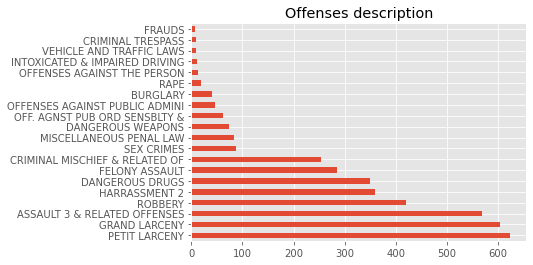

In [11]:
#Counting the number of appearances of different types of crimes 
data_cleaned.OFNS_DESC.value_counts().iloc[:20].plot(kind="barh", title = "Offenses description")

In [12]:
# Check groups of crimes and the number of crimes in each group (notice severities 1 & 4)
data_cleaned.OFNS_DESC.value_counts().sort_values(ascending=False)

PETIT LARCENY                           624
GRAND LARCENY                           605
ASSAULT 3 & RELATED OFFENSES            569
ROBBERY                                 420
HARRASSMENT 2                           359
DANGEROUS DRUGS                         349
FELONY ASSAULT                          285
CRIMINAL MISCHIEF & RELATED OF          253
SEX CRIMES                               87
MISCELLANEOUS PENAL LAW                  84
DANGEROUS WEAPONS                        74
OFF. AGNST PUB ORD SENSBLTY &            62
OFFENSES AGAINST PUBLIC ADMINI           46
BURGLARY                                 41
RAPE                                     19
OFFENSES AGAINST THE PERSON              14
INTOXICATED & IMPAIRED DRIVING           11
VEHICLE AND TRAFFIC LAWS                 10
CRIMINAL TRESPASS                         9
POSSESSION OF STOLEN PROPERTY             8
FRAUDS                                    8
GRAND LARCENY OF MOTOR VEHICLE            7
OFFENSES INVOLVING FRAUD        

<AxesSubplot:title={'center':'Number of crimes per borough'}>

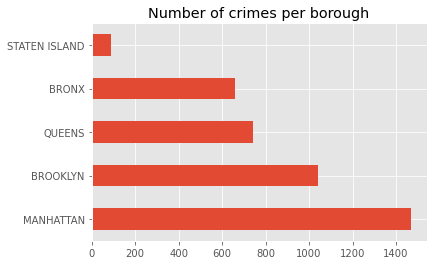

In [13]:
data_cleaned.BORO_NM.value_counts().iloc[:20].plot(kind="barh", title = "Number of crimes per borough")

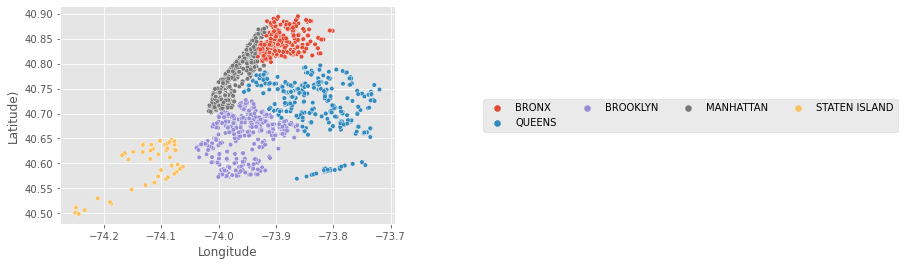

In [14]:
#Here i want to visualize a graph of distribution representing the number of crimes per borough
g = sns.scatterplot(x='Longitude', y='Latitude', data=data_cleaned, hue='BORO_NM', s=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=4)
plt.show()

In [15]:
# g = sns.scatterplot(x='Longitude', y='Latitude', data=data_cleaned, hue='PARKS_NM', s=20)
# plt.xlabel('Longitude')
# plt.ylabel('Latitude)')
# g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=4)
# plt.show()

<AxesSubplot:title={'center':'Location of the crime'}>

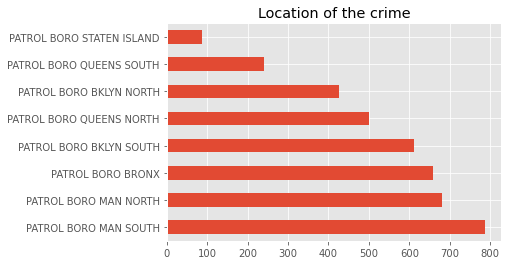

In [16]:
data_cleaned.PATROL_BORO.value_counts().iloc[:20].plot(kind="barh", title = "Location of the crime")

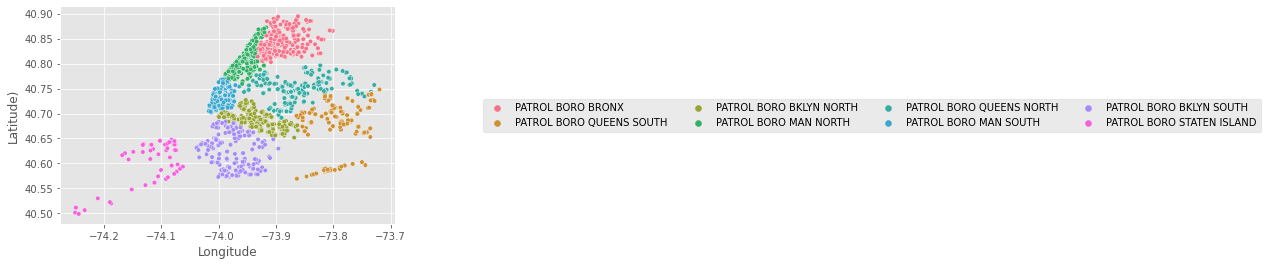

In [17]:
#Here i want to visualize a graph of distribution representing the number of crimes per  patrol borough
g = sns.scatterplot(x='Longitude', y='Latitude', data=data_cleaned, hue='PATROL_BORO', s=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=4)
plt.show()

In [18]:
data1=data_cleaned

fig = px.density_mapbox(data1, lat='Latitude', lon='Longitude', radius=5, zoom=5,
                        color_continuous_scale=px.colors.sequential.YlOrRd,
                        mapbox_style="stamen-terrain")
fig.update_layout(
        title = 'Location of the crimes',
)
fig.show()

<AxesSubplot:title={'center':'crime per percinct'}>

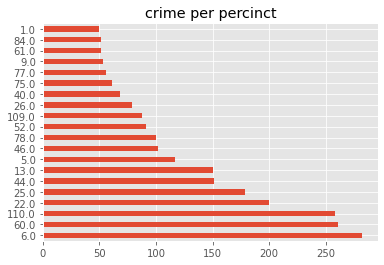

In [19]:
#Visualizing the number of crimes per percinct
data_cleaned.ADDR_PCT_CD.value_counts().iloc[:20].plot(kind="barh", title = "crime per percinct")

In [20]:
#Here I want to visualize the distribution of crimes in each percinct or borough on a map
latitude = 37.0902
longitude = -95.7129
def generateBaseMap(default_location=[latitude,longitude], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

base_map = generateBaseMap()
m = HeatMap(data=data_cleaned[['Latitude', 'Longitude', 'CMPLNT_NUM']].groupby(['Latitude','Longitude']).sum().reset_index().values.tolist(), radius=7, max_zoom=10).add_to(base_map)
base_map.save('./heatmap.html')

In [21]:
base_map

In [22]:
data2=data_cleaned.dropna(subset=['ADDR_PCT_CD'])
latitude = 40.5397293
longitude = -74.6273494
traffic_map = folium.Map(location=[latitude, longitude], zoom_start=5)
colordict = {0: 'lightblue', 1: 'lightgreen', 2: 'orange', 3: 'red'}
for lat, lon, cmplnt in zip(data2['Latitude'], data2['Longitude'], data2['ADDR_PCT_CD']):
    folium.Marker(
        [lat, lon],
        radius=12,
        color='b',
        threshold_scale=[0,1,2,3],
        fill_color=colordict[0],
        fill=True,
        fill_opacity=0.7
        ).add_to(traffic_map)
traffic_map

### Distribution of crimes over the time

In [23]:
#data_cleaned.groupby('Month').size().plot(kind = 'bar', title ='Total Crime Events by Month', color = '#C0392B',rot=0)

<AxesSubplot:title={'center':'Total Crime each Day'}, xlabel='hours'>

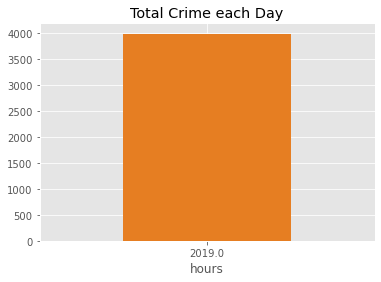

In [24]:
data_cleaned.groupby('year').size().plot(kind ='bar', title ='Total Crime each Day', color ='#E67E22', xlabel ='hours',rot=0)

In [25]:
# Find out the average of crimes in the dataset
allday_lst=data_cleaned.CMPLNT_FR_DT.astype(str).str.split(' ') 
allday_lst2=[item[0] for item in allday_lst] 

print('For this dataset:')
print('There are {} total crimes.'.format(data_cleaned.shape[0]))
print('There are {} total days.'.format(len(allday_lst2)))
print('There are {} unique days.'.format(len(set(allday_lst2))))
print('On average, there are app. {} crimes per day.'.format(round(data_cleaned.shape[0]/len(set(allday_lst2)))))

For this dataset:
There are 3995 total crimes.
There are 3995 total days.
There are 360 unique days.
On average, there are app. 11 crimes per day.


### WWW (When, Where, & Who)

array([<AxesSubplot:ylabel='VIC_SEX'>], dtype=object)

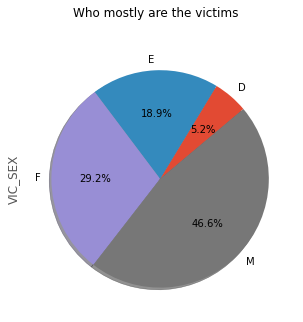

In [26]:
data_cleaned['VIC_SEX'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(5,5), autopct='%1.1f%%', title = 'Who mostly are the victims')

In [27]:
# data_cleaned['Weekday'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
# figsize=(5,5), autopct='%1.1f%%', title = 'Which day mostly these crimes happen')

array([<AxesSubplot:ylabel='VIC_SEX'>], dtype=object)

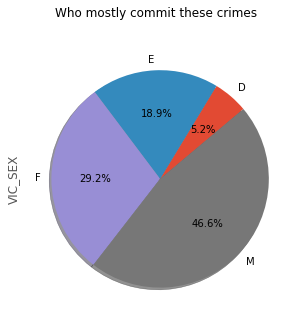

In [28]:
data_cleaned['VIC_SEX'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(5,5), autopct='%1.1f%%', title = 'Who mostly commit these crimes')

In [29]:
data_cleaned.LAW_CAT_CD.value_counts().sort_values(ascending=False)

MISDEMEANOR    2008
FELONY         1615
VIOLATION       372
Name: LAW_CAT_CD, dtype: int64

array([<AxesSubplot:ylabel='LAW_CAT_CD'>], dtype=object)

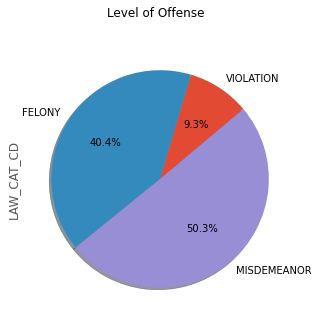

In [30]:
data_cleaned['LAW_CAT_CD'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(5,5), autopct='%1.1f%%', title = 'Level of Offense')

<AxesSubplot:title={'center':'Parks where the crime occured'}>

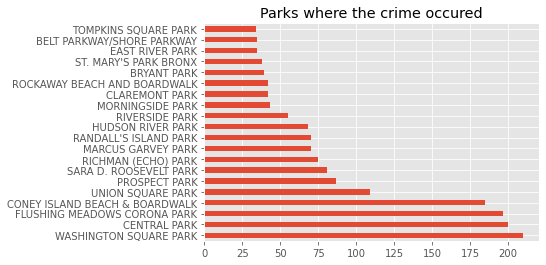

In [31]:
data_cleaned.PARKS_NM.value_counts().iloc[:20].plot(kind="barh", title = "Parks where the crime occured")

In [32]:
h = data_cleaned[data_cleaned['BORO_NM']=="BRONX"]['PARKS_NM']
h.unique()

array(['CLAREMONT PARK', "ST. MARY'S PARK BRONX", 'FRANZ SIGEL PARK',
       'RICHMAN (ECHO) PARK', 'MOUNT HOPE PLAYGROUND', 'MACOMBS DAM PARK',
       'DEVOE PARK', 'PELHAM BAY PARK', 'JOSEPH RODMAN DRAKE PARK',
       'SLATTERY PLAYGROUND', 'WASHINGTON PARK BRONX', 'AQUEDUCT WALK',
       'PATTERSON PLAYGROUND', 'CLARK PLAYGROUND', 'ARCILLA PLAYGROUND',
       'BRONX RIVER PARKWAY', 'RAINEY PARK BRONX', 'JOYCE KILMER PARK',
       'CROTONA PARK', 'UNIVERSITY WOODS', 'WILLIAMSBRIDGE OVAL',
       'OWEN F. DOLEN PARK', 'MOSHOLU PARKWAY', 'SOUNDVIEW PARK',
       'POE PARK', 'ST. JAMES PARK', 'MULLALY PARK',
       "D'AURIA-MURPHY TRIANGLE", 'GRANT PARK', 'SAW MILL PLAYGROUND',
       'NOBLE PLAYGROUND', 'MATTHEWS MULINER PLAYGROUND', 'BRONX PARK',
       'THORPE FAMILY PLAYGROUND', 'ADMIRAL FARRAGUT PLAYGROUND',
       'SETON FALLS PARK', 'WALTON PARK', 'LORETO PLAYGROUND',
       'TREMONT PARK', 'JAMES BURKE BALLFIELD', 'STARLIGHT PARK',
       'VAN CORTLANDT PARK', 'MARBLE HILL PLAYG

array([<AxesSubplot:ylabel='VIC_AGE_GROUP'>], dtype=object)

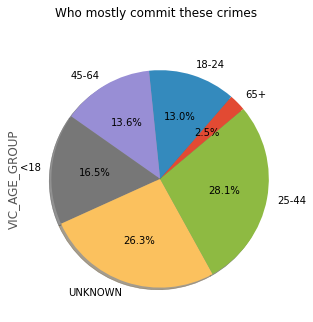

In [33]:
data_cleaned['VIC_AGE_GROUP'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(5,5), autopct='%1.1f%%', title = 'Who mostly commit these crimes')